# Data Preparation & Visualisation

## Question 1: You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from IPython.display import display

#### After importing all the required liabraries I have download the dataset from CSO official website. which is unemployment datase. Lets load it into here so we can perform operations on it. To load our dataset I am using pandas built in method named read_csv, which will load the datset to work it on.


In [38]:
monthlyUnemploymentDF=pd.read_csv('MUM01.20231006T231032.csv')

#### Before visualize our data. We need to understrannd it first. for that let's perform some EDA on it. First of all let's look into out data. we can use head method to  to look into the data that how it looks.


In [39]:
monthlyUnemploymentDF.head()

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
0,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Both sexes,%,13.3,Thousand,55.4
1,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Male,%,13.7,Thousand,31.5
2,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Female,%,12.7,Thousand,23.9
3,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Both sexes,%,7.4,Thousand,96.2
4,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Male,%,6.9,Thousand,55.4


### With the help of head method we got to know that our dataset contains these columns:
#### 1)The first column is statistic lable which tellls us the type of statistics. And in this case it is seasonally Adjusted Monthly Unemployment Rate.
#### 2)Second is Month column which contains Month and year of data.
#### 3)Third is Age group, which contains all the age groups
#### 4)The fourth is Ses which contains genders
#### 5)Fifth is unit and it is unit of the 'Value In Percentage Column' and it is %
#### 6)Next column is Value In Percentage  which contains unemployment rate in percentage.
#### 7)seventh column is unit of 'Value In Thousands' column and it is in thousand
#### 8)the last column in our dataset is Value In Thousands which contains the unemployment rate in thousands.

#### We can also use tail method to check last few rows of our data.

In [40]:
monthlyUnemploymentDF.tail()

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
1849,Seasonally Adjusted Monthly Unemployment Rate,2023 September,15 - 24 years,Male,%,12.5,Thousand,22.5
1850,Seasonally Adjusted Monthly Unemployment Rate,2023 September,15 - 24 years,Female,%,11.3,Thousand,19.0
1851,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Both sexes,%,3.1,Thousand,74.2
1852,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Male,%,3.2,Thousand,40.7
1853,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Female,%,2.9,Thousand,33.5


#### To check how many roas and column do we have in our dataset, we can use shape mehtod. this way we will get the idea that how large our dataset is. we will get total nunber of rows and columns in return.



In [41]:
monthlyUnemploymentDF.shape

(1854, 8)

#### Now lets check for the colunm names of my dataset. We can use columns keyword for that. it will retuen all the colunm names to us.

In [42]:
monthlyUnemploymentDF.columns

Index(['Statistic Label', 'Month', 'Age Group', 'Sex', 'UNIT',
       'VALUE In Percentage', 'UNIT.1', 'VALUE In Thousands'],
      dtype='object')

#### Now Let's look for any Null values in our dataset. we use isNull method to look for null values in our datase. We will use sum method with it. Sum will count all the missing values and show it to us.This is important for the analysis beause if we have null values so we need to fix it using the mean or median.

In [43]:
monthlyUnemploymentDF.isnull().sum()

Statistic Label        0
Month                  0
Age Group              0
Sex                    0
UNIT                   0
VALUE In Percentage    0
UNIT.1                 0
VALUE In Thousands     0
dtype: int64

#### Now let's graphically display the data as well to see if we have any missing data.

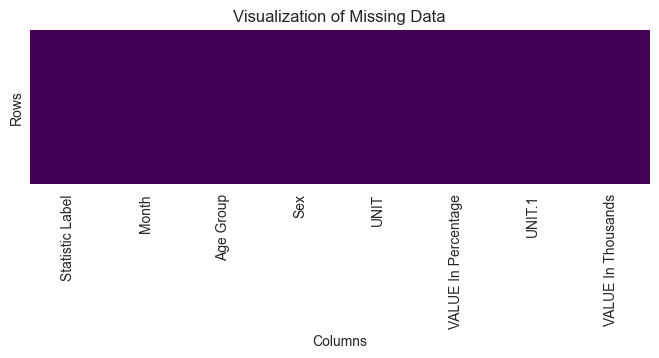

In [44]:
plt.figure(figsize=(8,2))
sbn.heatmap(monthlyUnemploymentDF.isnull(),cbar=False,cmap='viridis', yticklabels=False)
plt.title("Visualization of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

#### As we can see above that we don't have any missing data in our dataset

#### Now lets look for any duplicate values in our datase. It is very common to get duplicate data in our dataset.It is important step to look for any duplicate rows in dataset and remove them if we find any.

In [45]:
dupliatevaluesForDA = monthlyUnemploymentDF.duplicated().sum()
print("Duplicate rows in our Dataset are: ", dupliatevaluesForDA)

Duplicate rows in our Dataset are:  0


#### Anoother import step is to check the data type of each column. and if there is a mismath in the data aand it's type. we can fix it. Below I used the info method to test the data types of each column.

In [46]:
monthlyUnemploymentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      1854 non-null   object 
 1   Month                1854 non-null   object 
 2   Age Group            1854 non-null   object 
 3   Sex                  1854 non-null   object 
 4   UNIT                 1854 non-null   object 
 5   VALUE In Percentage  1854 non-null   float64
 6   UNIT.1               1854 non-null   object 
 7   VALUE In Thousands   1854 non-null   float64
dtypes: float64(2), object(6)
memory usage: 116.0+ KB


#### As we noticed above that our Month column is of object type. We will convert it later while preparing our data for ML.

In [47]:
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
#print("New Date: ", monthlyUnemploymentDF['Month'])

#### Now lets get some statistics about our data using describe method. It will give us standard deviation,count, mean etc

In [48]:
monthlyUnemploymentDF.describe()

,VALUE In Percentage,VALUE In Thousands
count,1854.000000,1854.000000
mean,10.680529,56.665696
std,7.539243,48.541094
min,2.900000,11.000000
25%,4.700000,25.200000
50%,8.800000,39.000000
75%,13.200000,69.675000
max,39.300000,268.400000


### With the help of describe method we came to the conclusion that in Value In Percentage the average unemployment rate is around 10.68% and the minimum unemployment rate is 2.9%. We got discovered that the median is 8.8 percent. and we noticied that half of the observasions are below 8.8% and half are above 8.8% in uneployment rates.The aevrage of  unemployment in thousands is 56.67k. The minimum count is 11k and maximum is 268.4k and median is 39k.


### Now let's visualize out of range data. we can use numerical columns for that. and we weill be using boxplot to look for outliers. Outliers are data points that are different from other data points. for example we have a data of a store and we are checking how many oranges are sold per day and one datapoint shows that 200,000 sold per day so that will be outlier.

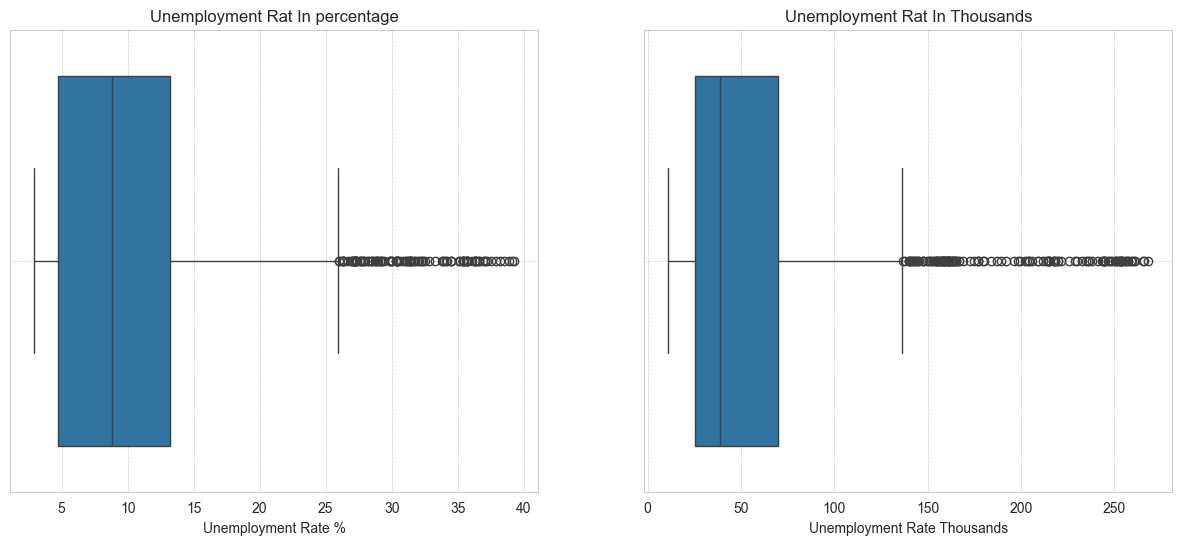

In [49]:
# visualizing out of range data data using boxplot
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# BoxPlot for value In Percentage
sbn.boxplot(x=monthlyUnemploymentDF['VALUE In Percentage'],ax=ax[0])
ax[0].set_title("Unemployment Rat In percentage")
ax[0].set_xlabel("Unemployment Rate %")
ax[0].grid(True, which="both",linestyle='--',linewidth=0.5)

# BoxPlot for value In Thousands
sbn.boxplot(x=monthlyUnemploymentDF['VALUE In Thousands'],ax=ax[1])
ax[1].set_title("Unemployment Rat In Thousands")
ax[1].set_xlabel("Unemployment Rate Thousands")
ax[1].grid(True, which="both",linestyle='--',linewidth=0.5)

#### For Unemployment Rate In Percentage, We can see above that the unemployment rate looks normal(Most Of The Time). But In few times when it goes up a little. This can happen because of many reasons like some age group of people having bad time finding jobs. And for Unemployment rate in Thousands,it is either very less or lot of people without jobs than usual. this could be because of a time when people find it easy or difficult to find job or for some age group it is easy or hard to get job.


### Now let's look for dirty data. let's use some categorical column (Sex and Age Group) and display their distribution to find inconsistencies. Let's test Sex column and look for inconsistant labels or uneexpected categories.

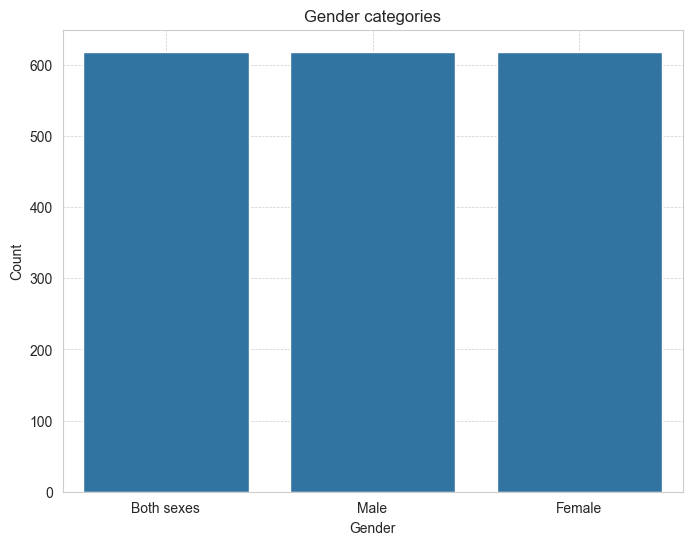

In [50]:
#visualize the distribution of categories in the sex column
plt.figure(figsize=(8,6))
sbn.countplot(data=monthlyUnemploymentDF,x='Sex')
plt.title("Gender categories")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True,which="both",linestyle="--",linewidth=0.5)
plt.show()

#### The above plot shows that the data is consistant. We got distinct categories of male, female and both sexes. Now to futher check for dirty data we should also check the other categorical column 'Age Group' to make sure that our data isn't dirty. So let's check the other column now.

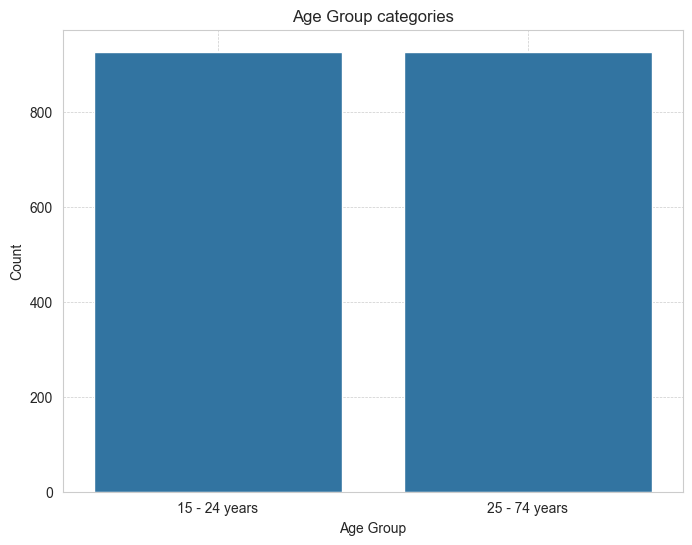

In [51]:
#visualize the distribution of categories in the sex column
plt.figure(figsize=(8,6))
sbn.countplot(data=monthlyUnemploymentDF,x='Age Group')
plt.title("Age Group categories")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(True,which="both",linestyle="--",linewidth=0.5)
plt.show()

#### We got the distinct categories(15 - 24 years and 25 to 75 years). so the data seems consistant.

#### Now lets do one more step to check the data consistency . As we already checked for any missing values in our dataset so let's check if the month column is in good format.

In [52]:
# Extracting unique month year combinations
monthUniqueValues=monthlyUnemploymentDF['Month'].unique()

# let's check for first few and last few rows for consistency
firstAndLastRows=np.concatenate([monthUniqueValues[:5],monthUniqueValues[-5:]])
firstAndLastRows

array(['1998-01-01T00:00:00.000000000', '1998-02-01T00:00:00.000000000',
       '1998-03-01T00:00:00.000000000', '1998-04-01T00:00:00.000000000',
       '1998-05-01T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
       '2023-06-01T00:00:00.000000000', '2023-07-01T00:00:00.000000000',
       '2023-08-01T00:00:00.000000000', '2023-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

####  This data looks consistant. the first few rows are of from 1998 January To May. and last few are from 2023 june to september

### Lets Visualize our dataset to understand it better. We can use different plots to know more about our data visually

#### Let's plot the distribution of 'Vvalue in thousands' and 'Value In pErentage'. I am using histogram to plot it because it is primary tool to understand the numerical data. The data get partitioned into bins and then it counts the number of rows for every bin and this way we can see if data is clustered and if there are any outliers. With histograms we an have quick view of distributions

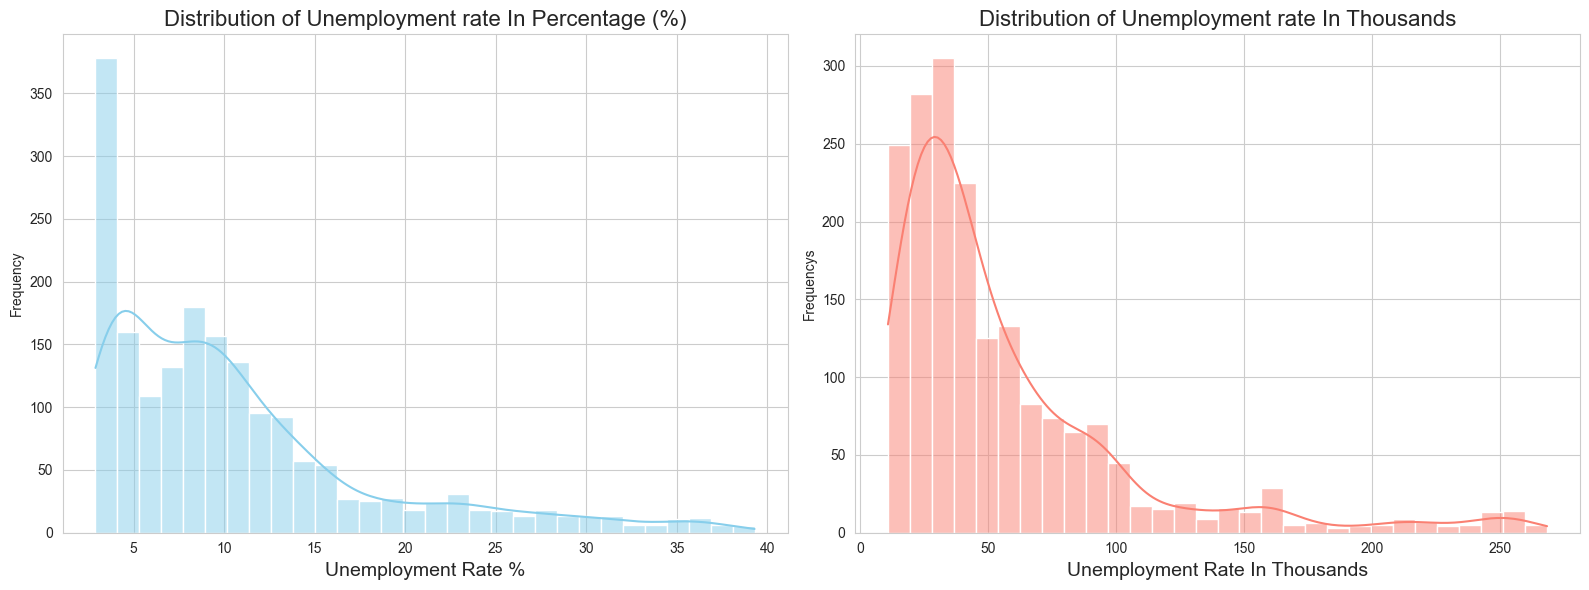

In [53]:
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
# first of all i will set the style for seaborn plot to get better aesthetics
sbn.set_style("whitegrid")

# ccreate a figure for 2 subplots. one for each column
fig,ax = plt.subplots(1,2,figsize=(16,6))

# lets plot distribution for 'Value In Percentage'
# i will be using kernel density estimation to get a smooth curve which estimates the probability density function of the variable
sbn.histplot(monthlyUnemploymentDF['VALUE In Percentage'], bins=30, ax=ax[0],kde=True,color='skyblue')
ax[0].set_title("Distribution of Unemployment rate In Percentage (%)",fontsize=16)
ax[0].set_xlabel("Unemployment Rate %",fontsize=14)
ax[0].set_ylabel("Frequency")

# Lets plot for Value In Thousands
sbn.histplot(monthlyUnemploymentDF['VALUE In Thousands'], bins=30, ax=ax[1],kde=True,color='salmon')
ax[1].set_title("Distribution of Unemployment rate In Thousands",fontsize=16)
ax[1].set_xlabel("Unemployment Rate In Thousands",fontsize=14)
ax[1].set_ylabel("Frequencys")

plt.tight_layout()
plt.show()

#### well this graph explains taht the most of the data points indicate the unemployment rate between 3 to 15 percent. In few ases the unemployment rate is close to  40 percent. This could be becaus eof specific genders,age groups or year and month. And in unemployment rate in thousands most of the data points are between 10 to 80k. few people crossing 200k and this could be because of different age group or gender or time.

#### I used the different colors for two graphs because this way it will be differentisted. and viewr an focus on them. skyblue and salmon color really contras well.

## Let's plot another graph for Unemployment Rate Over Time and understand our data better

### Let's create line graph to show the unemployment rate over time. As we know thes graphs are goood to show change over time. I am going to plot unemployment rate by month so this is best graoh to work with.

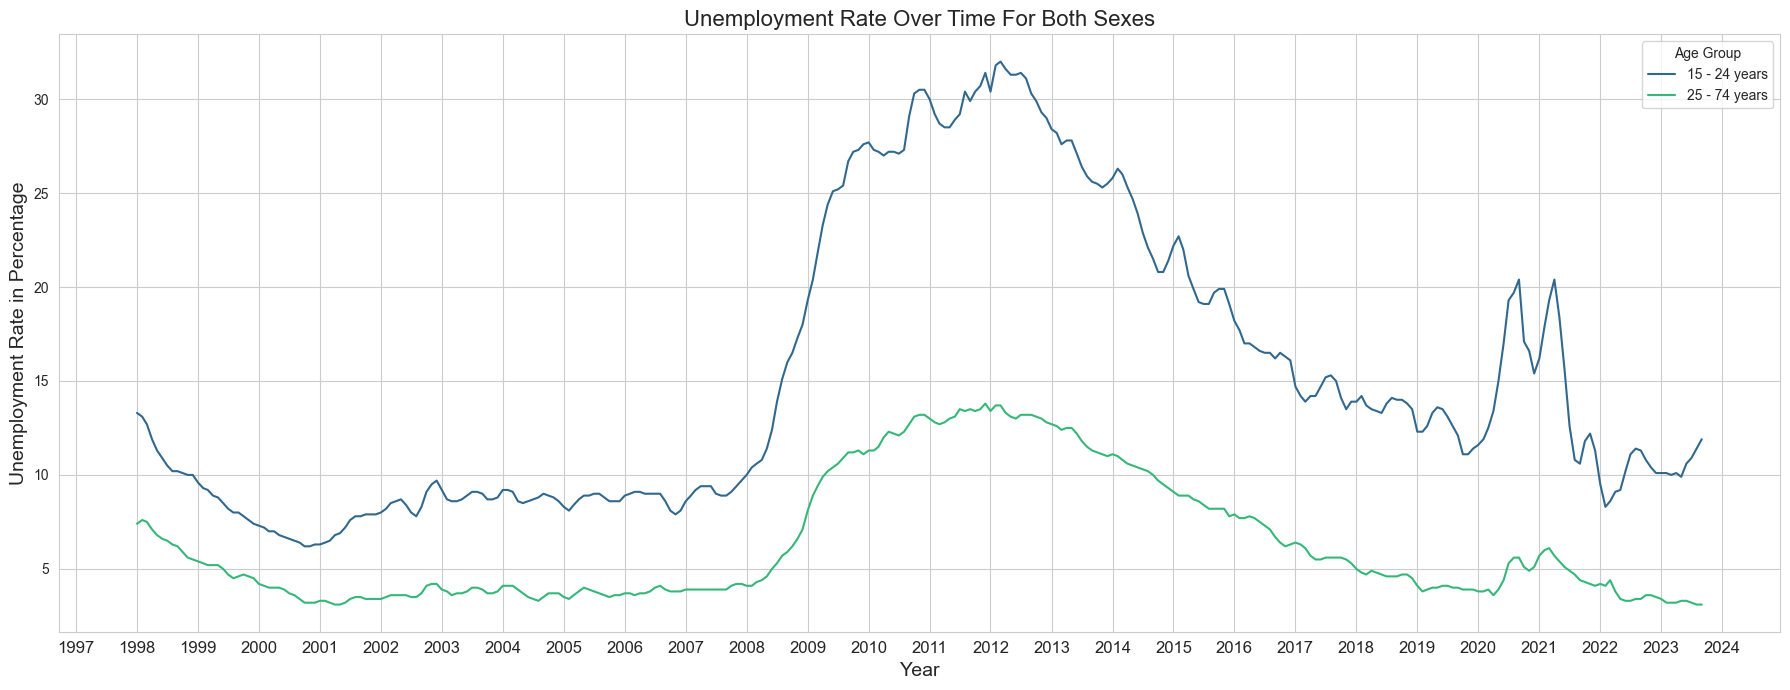

In [54]:
import matplotlib.dates as mdates
# First of all let's select both sexes from our data so we can see the graph for ale and female
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
filetredOfBothSexForViz = monthlyUnemploymentDF[monthlyUnemploymentDF['Sex']=='Both sexes']

# let's set teh size of our graph
plt.figure(figsize=(18,7))

# we will draw line to show the unemployment rate in percentage and diffrent shades for different age groups and with help of viridis we an easily differentiate colors because it gives the good progression of colors
sbn.lineplot(data=filetredOfBothSexForViz, x= 'Month',y='VALUE In Percentage',hue="Age Group",palette="viridis")

# Let's set the title and labels and also the size
plt.title("Unemployment Rate Over Time For Both Sexes", fontsize=16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel("Unemployment Rate in Percentage", fontsize = 14)
plt.legend(title="Age Group")

# Since we have alot of data and we can't show motnh of eah year beause it won't be readable so let's adjust our x-axix to show only start of eery year
plt.xticks(fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# we don't want our lables and titles to overlap so lets use tight_layout function and display the graph
plt.tight_layout()
plt.show()

### With the help of above graph we can see how the unemployment rate has changed over time for diffrent age groups. With lines in our graph we an see good and bad times in unemployment rate. This graph is for different age groups so we can see if one age group is affected in different time. Also I have increasef the size of labels and titiles so they area easily readable now.

## Now let's create one more graph and display unemployment rate by Age groups and Genders. 

### With teh help of this graph we an get to knwo how unemployment rate changes across different age groups and genders. So we will know which age groups are ore affected by unemployment rate and if tere are inconsistancy between different genders in these age groups.

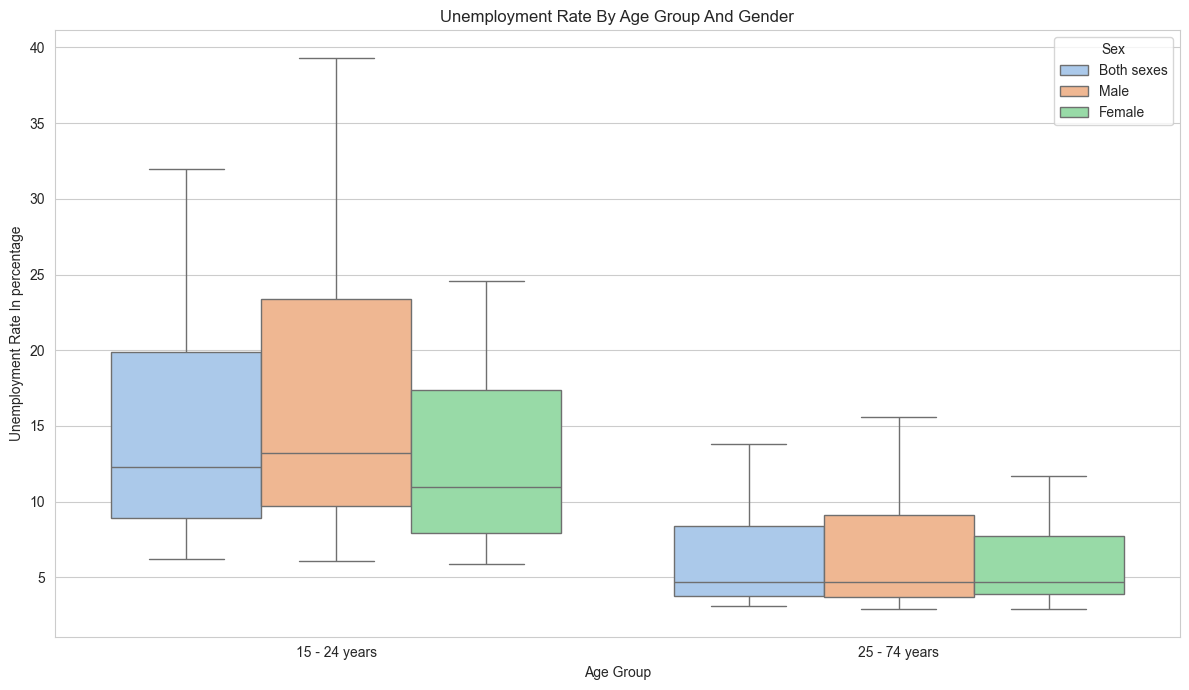

In [55]:
# Let's create size of plot
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
plt.figure(figsize=(12,7))
sbn.boxplot(data=monthlyUnemploymentDF,x='Age Group', y='VALUE In Percentage',hue='Sex',palette='pastel')
plt.title("Unemployment Rate By Age Group And Gender")
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate In percentage")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

### By using Boxplot we can compare the distribution of unemployment rates by different age groups and genders side by side. we can use other plots like bar plots for this situation as well but the boxplot is useful when we want to study the distribution and spread of data. 

 # Question: You must also rationalise justify and detail all the methods used to prepare the data for ML. [0-30]

### As we already checked for any  null or duplicate values in our EDA and fortunately we have no null or duplicate alues in our dataset. This is important step because if we have any gaps in our data so we need to fill them or handle duplicate values and we don't do that so we will get incorrect results while using the data for predictions.

### Now lets  move to the next step and prepare our data for ML

### Let's do some feature engineering. As we know that features are used to make predictions. So feature engineering is like making those variables for meaningful analysis.  For example in our dataset the Month column has both year and Month in it (like this: 1998 July).Let's get year and month into 2 seprate columns. By doing this it will be easy for Machine Learning models to spot trends over time.

In [57]:
# Let's first convert the month into datetime
monthlyUnemploymentDF['Year']=pd.to_datetime(monthlyUnemploymentDF['Month'])

# now we can extract the month and year using from datetime format
monthlyUnemploymentDF['Year']=monthlyUnemploymentDF['Month'].dt.year
monthlyUnemploymentDF['MonthNumber'] = monthlyUnemploymentDF['Month'].dt.month

# Now we have month and year seprately. so lets drop month column
monthlyUnemploymentDF.drop('Month',axis=1,inplace=True)
monthlyUnemploymentDF.head()

,Statistic Label,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands,Year,MonthNumber
0,Seasonally Adjusted Monthly Unemployment Rate,15 - 24 years,Both sexes,%,13.3,Thousand,55.4,1998,1
1,Seasonally Adjusted Monthly Unemployment Rate,15 - 24 years,Male,%,13.7,Thousand,31.5,1998,1
2,Seasonally Adjusted Monthly Unemployment Rate,15 - 24 years,Female,%,12.7,Thousand,23.9,1998,1
3,Seasonally Adjusted Monthly Unemployment Rate,25 - 74 years,Both sexes,%,7.4,Thousand,96.2,1998,1
4,Seasonally Adjusted Monthly Unemployment Rate,25 - 74 years,Male,%,6.9,Thousand,55.4,1998,1


### Now let's move further and convert our categorical features into numerial columns becasue we know that machine learning models prefer numbers.  We have 2 categorical columns (Age Group and Sex) and limited numbers of unique values so we will use one-hot encoding which is good for such situations. with help of this we can create a column for each category and use 0 and 1 to show the presence of value. This process is called encoding. Machine learning models use such data effetively.

In [58]:
encodedDataForAgeAndSex=pd.get_dummies(monthlyUnemploymentDF, columns=['Age Group', 'Sex'])
#Lets's display to see the output
encodedDataForAgeAndSex

,Statistic Label,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands,Year,MonthNumber,Age Group_15 - 24 years,Age Group_25 - 74 years,Sex_Both sexes,Sex_Female,Sex_Male
0,Seasonally Adjusted Monthly Unemployment Rate,%,13.3,Thousand,55.4,1998,1,1,0,1,0,0
1,Seasonally Adjusted Monthly Unemployment Rate,%,13.7,Thousand,31.5,1998,1,1,0,0,0,1
2,Seasonally Adjusted Monthly Unemployment Rate,%,12.7,Thousand,23.9,1998,1,1,0,0,1,0
3,Seasonally Adjusted Monthly Unemployment Rate,%,7.4,Thousand,96.2,1998,1,0,1,1,0,0
4,Seasonally Adjusted Monthly Unemployment Rate,%,6.9,Thousand,55.4,1998,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1849,Seasonally Adjusted Monthly Unemployment Rate,%,12.5,Thousand,22.5,2023,9,1,0,0,0,1
1850,Seasonally Adjusted Monthly Unemployment Rate,%,11.3,Thousand,19.0,2023,9,1,0,0,1,0
1851,Seasonally Adjusted Monthly Unemployment Rate,%,3.1,Thousand,74.2,2023,9,0,1,1,0,0
1852,Seasonally Adjusted Monthly Unemployment Rate,%,3.2,Thousand,40.7,2023,9,0,1,0,0,1


### Now if we look at our dataset. we see that Unit and Unit.1 is not important for our analysis. so let's drop them. Removing unnecessary features make our analysis fast.  these Unit and Unit.1 features are repeating some information.

In [62]:
dropedUnitAndUnit1 = encodedDataForAgeAndSex.drop(columns=['UNIT','UNIT.1'])
monthlyUnemploymentFilteredDF=dropedUnitAndUnit1
monthlyUnemploymentFilteredDF.head()

,Statistic Label,VALUE In Percentage,VALUE In Thousands,Year,MonthNumber,Age Group_15 - 24 years,Age Group_25 - 74 years,Sex_Both sexes,Sex_Female,Sex_Male
0,Seasonally Adjusted Monthly Unemployment Rate,13.3,55.4,1998,1,1,0,1,0,0
1,Seasonally Adjusted Monthly Unemployment Rate,13.7,31.5,1998,1,1,0,0,0,1
2,Seasonally Adjusted Monthly Unemployment Rate,12.7,23.9,1998,1,1,0,0,1,0
3,Seasonally Adjusted Monthly Unemployment Rate,7.4,96.2,1998,1,0,1,1,0,0
4,Seasonally Adjusted Monthly Unemployment Rate,6.9,55.4,1998,1,0,1,0,0,1


# Question: Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. 

####  First of all after loading our data we looked into the structure of our data using head and tail methods. We also described our adta and 

# Statistics for Data Analytics

## Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

#### Lets start by looking into the dataset taht what we have in it and about data types or any null values

In [60]:
monthlyUnemploymentFilteredDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          1854 non-null   object 
 1   VALUE In Percentage      1854 non-null   float64
 2   VALUE In Thousands       1854 non-null   float64
 3   Year                     1854 non-null   int64  
 4   MonthNumber              1854 non-null   int64  
 5   Age Group_15 - 24 years  1854 non-null   uint8  
 6   Age Group_25 - 74 years  1854 non-null   uint8  
 7   Sex_Both sexes           1854 non-null   uint8  
 8   Sex_Female               1854 non-null   uint8  
 9   Sex_Male                 1854 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(5)
memory usage: 81.6+ KB


#### This above inforation = shows that we have total 1854 rows and 10 ccolumns in total. First Of all we got the 'Statistic Label' column which has no null value and is of string type. This olumn is woking like a label and telling us we heve unemployment data.  The second column 'VALUE In Percentage' has unemployment rate in percentage. there are no null values in the dataset and the datatype of it is float then the next column 'VALUE In Thousands' shows the number of unemployed people in thousands. and it's not null as well. Then Age Group_15 - 24 years  and Age Group_25 - 74 years are binary column and accept 0 and 1 as value and are all not null. Sex_Both sexes , Sex_Female AND Sex_Male are binary column too indicating gender category. Year and monthNuber are extracted from month column and are of int type and all are not null.

### Now let's calculate the mean, median, variance, and standard deviation. First We will calculate the basic measures and then we will calculate them for each age group and genders using 'VALUE in percentage' and 'VALUE in Thousands' columns.

In [74]:
# Basic measures for whole dataset

basicMeasuresForWholeData ={
    'Mean Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].mean(),
    'Median Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].median(),
    'Variance Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].var(),
    'Standard Deviation Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].std(),
    
    'Mean Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].mean(),
    'Median Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].median(),
    'Variance Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].var(),
    'Standard Deviation Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].std()
}
basicMeasureTableDF=pd.DataFrame(basicMeasuresForWholeData, index =['Value']).T
display(basicMeasureTableDF);

,Value
Mean Percentage,10.680529
Median Percentage,8.800000
Variance Percentage,56.840187
Standard Deviation Percentage,7.539243
Mean Thousands,56.665696
Median Thousands,39.000000
Variance Thousands,2356.237840
Standard Deviation Thousands,48.541094


#### Now let's group the data and find the measures for grouped data.

In [81]:
calculatingGroupedMean = monthlyUnemploymentFilteredDF.groupby([monthlyUnemploymentFilteredDF['Age Group_15 - 24 years'],
                                                              monthlyUnemploymentFilteredDF['Sex_Male']]).mean()[['VALUE In Percentage','VALUE In Thousands']]

calculatingGroupedMedian = monthlyUnemploymentFilteredDF.groupby([monthlyUnemploymentFilteredDF['Age Group_15 - 24 years'],
                                                              monthlyUnemploymentFilteredDF['Sex_Male']]).median()[['VALUE In Percentage','VALUE In Thousands']]

calculatingGroupedVariance = monthlyUnemploymentFilteredDF.groupby([monthlyUnemploymentFilteredDF['Age Group_15 - 24 years'],
                                                              monthlyUnemploymentFilteredDF['Sex_Male']]).var()[['VALUE In Percentage','VALUE In Thousands']]

calculatingGroupedstd = monthlyUnemploymentFilteredDF.groupby([monthlyUnemploymentFilteredDF['Age Group_15 - 24 years'],
                                                              monthlyUnemploymentFilteredDF['Sex_Male']]).std()[['VALUE In Percentage','VALUE In Thousands']]

basicMeasuresForWholeData,calculatingGroupedMean,calculatingGroupedMedian,calculatingGroupedVariance,calculatingGroupedstd

indexMap={
    
    (0,0):'25-74 years, Female',
    (0,1):'25-74 years, Male',
    (1,0):'15-24 years, Female',
    (1,1):'15-24 years, Male',
}

calculatingGroupedMean=calculatingGroupedMean.rename(index=indexMap)
calculatingGroupedMedian=calculatingGroupedMedian.rename(index=indexMap)
calculatingGroupedVariance=calculatingGroupedVariance.rename(index=indexMap)
calculatingGroupedstd=calculatingGroupedstd.rename(index=indexMap)

# Display the tables
display(calculatingGroupedMean)
display(calculatingGroupedMedian)
display(calculatingGroupedVariance)
display(calculatingGroupedstd)




VALUE In Percentage  VALUE In Thousands
Age Group_15 - 24 years Sex_Male                                         
0                       0                    6.131230           84.283819
                        1                    6.706472           70.859871
1                       0                   13.961974           35.130097
                        1                   17.190291           30.306472

VALUE In Percentage  VALUE In Thousands
Age Group_15 - 24 years Sex_Male                                         
0                       0                         4.7                65.4
                        1                         4.7                50.3
1                       0                        11.5                31.9
                        1                        13.2                23.2

VALUE In Percentage  VALUE In Thousands
Age Group_15 - 24 years Sex_Male                                         
0                       0                    9.085749         3872.089786
                        1                   16.096387         1921.181891
1                       0                   45.991275          465.370568
                        1                   94.043282          205.249114

VALUE In Percentage  VALUE In Thousands
Age Group_15 - 24 years Sex_Male                                         
0                       0                    3.014258           62.226118
                        1                    4.012030           43.831289
1                       0                    6.781687           21.572449
                        1                    9.697592           14.326518